In [217]:
import pickle

with open('assessment.dat') as f:
    ass = pickle.load(f)

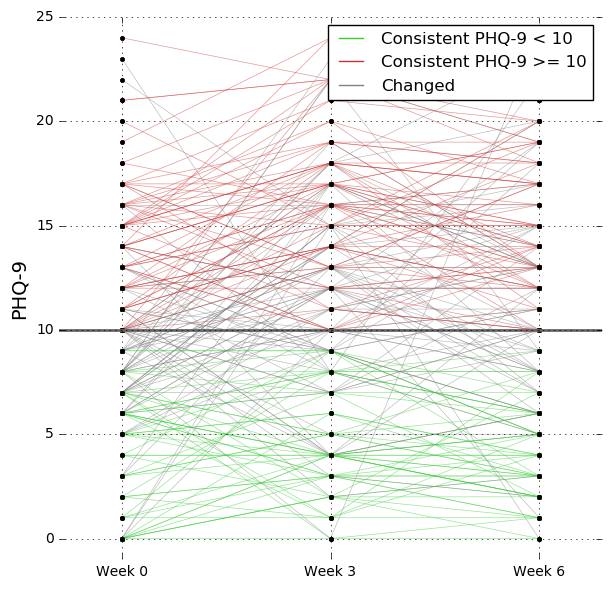

In [276]:
plt.figure(figsize=[7,7])
plt.plot([0,0],[0,0],color=(.2,.8,.2))
plt.plot([0,0],[0,0],color=(.8,.2,.2))
plt.plot([0,0],[0,0],color=(.5,.5,.5))
for i in range(ass.shape[0]):
    if (ass.loc[i,'PHQ9 W0']<10 and ass.loc[i,'PHQ9 W3']<10 and ass.loc[i,'PHQ9 W6']<10):
        cl = (.2,.8,.2)
    elif (ass.loc[i,'PHQ9 W0']>=10 and ass.loc[i,'PHQ9 W3']>=10 and ass.loc[i,'PHQ9 W6']>=10):
        cl = (.8,.2,.2)
    else:
        cl = (.5,.5,.5)
    plt.plot([1,2,3],[ass.loc[i,'PHQ9 W0'], ass.loc[i,'PHQ9 W3'], ass.loc[i,'PHQ9 W6']],color=cl,marker='.',linewidth=0.5, alpha=.5)
    plt.plot([1,2,3],[ass.loc[i,'PHQ9 W0'], ass.loc[i,'PHQ9 W3'], ass.loc[i,'PHQ9 W6']],'.',color=(0,0,0))
plt.ylabel('PHQ-9',fontsize=14)
# plt.xlabel('Time')
plt.xticks([1,2,3],['Week 0','Week 3','Week 6'])
plt.box(on=False)
plt.plot([0.7,3.3],[10,10],'-',color=(.4,.4,.4),linewidth=2)
plt.legend(['Consistent PHQ-9 < 10','Consistent PHQ-9 >= 10','Changed'],loc='upper right')
plt.xlim([0.7, 3.3])
plt.ylim([-1, 25])
plt.grid()


In [186]:
# thresholding

ass.loc[ass.loc[:,'PHQ9 W0']<10,'PHQ9 W0'] = 0.0
ass.loc[ass.loc[:,'PHQ9 W0']>=10,'PHQ9 W0'] = 1.0
ass.loc[ass.loc[:,'PHQ9 W3']<10,'PHQ9 W3'] = 0.0
ass.loc[ass.loc[:,'PHQ9 W3']>=10,'PHQ9 W3'] = 1.0
ass.loc[ass.loc[:,'PHQ9 W6']<10,'PHQ9 W6'] = 0.0
ass.loc[ass.loc[:,'PHQ9 W6']>=10,'PHQ9 W6'] = 1.0

ass.loc[ass.loc[:,'GAD7 W0']<10,'GAD7 W0'] = 0.0
ass.loc[ass.loc[:,'GAD7 W0']>=10,'GAD7 W0'] = 1.0
ass.loc[ass.loc[:,'GAD7 W3']<10,'GAD7 W3'] = 0.0
ass.loc[ass.loc[:,'GAD7 W3']>=10,'GAD7 W3'] = 1.0
ass.loc[ass.loc[:,'GAD7 W6']<10,'GAD7 W6'] = 0.0
ass.loc[ass.loc[:,'GAD7 W6']>=10,'GAD7 W6'] = 1.0

In [195]:
def my_innerprod(x,y):
    
    x = np.array(x, dtype=float)
    y = np.array(y, dtype=float)
    inds = np.union1d(np.where(np.isnan(x))[0],np.where(np.isnan(y))[0])
    x = np.delete(x, inds)
    y = np.delete(y, inds)
    return np.sum(x==y)/float(x.size)

In [196]:
import pandas as pd
import numpy as np

confusion = pd.DataFrame(columns=['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6'],\
                        index=['PHQ9 W0','PHQ9 W3','PHQ9 W6','GAD7 W0','GAD7 W3','GAD7 W6'])

for col in confusion.columns:
    for row in confusion.index:
        confusion.loc[row,col] = my_innerprod(ass.loc[:,row],ass.loc[:,col])

In [197]:
confusion

,PHQ9 W0,PHQ9 W3,PHQ9 W6,GAD7 W0,GAD7 W3,GAD7 W6
PHQ9 W0,1,0.687179,0.695652,0.540284,0.569231,0.570048
PHQ9 W3,0.687179,1,0.84456,0.54359,0.717949,0.746114
PHQ9 W6,0.695652,0.84456,1,0.618357,0.689119,0.777778
GAD7 W0,0.540284,0.54359,0.618357,1,0.651282,0.705314
GAD7 W3,0.569231,0.717949,0.689119,0.651282,1,0.787565
GAD7 W6,0.570048,0.746114,0.777778,0.705314,0.787565,1


In [213]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, labels, title='% Subjects', cmap=plt.cm.Blues, xsize=12, ysize=12):

    fig = plt.figure(figsize=(xsize,ysize))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1, picker=True)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    labels = ['W0 Depressed','W3 Depressed','W6 Depressed','W0 Anxious','W3 Anxious','W6 Anxious']
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
            

In [215]:
confusion

,PHQ9 W0,PHQ9 W3,PHQ9 W6,GAD7 W0,GAD7 W3,GAD7 W6
PHQ9 W0,1,0.687179,0.695652,0.540284,0.569231,0.570048
PHQ9 W3,0.687179,1,0.84456,0.54359,0.717949,0.746114
PHQ9 W6,0.695652,0.84456,1,0.618357,0.689119,0.777778
GAD7 W0,0.540284,0.54359,0.618357,1,0.651282,0.705314
GAD7 W3,0.569231,0.717949,0.689119,0.651282,1,0.787565
GAD7 W6,0.570048,0.746114,0.777778,0.705314,0.787565,1


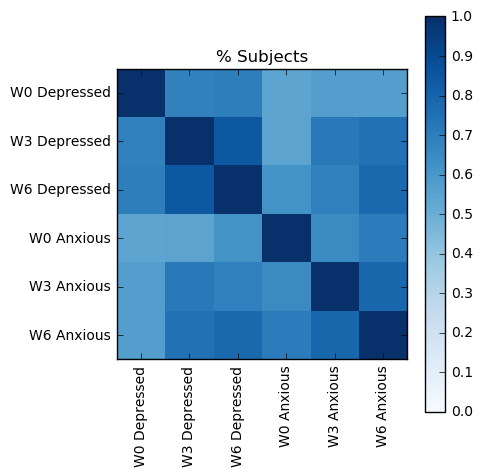

In [214]:
plot_confusion_matrix(np.array(confusion).astype(float), confusion.columns, xsize=5, ysize=5)

(array([ 103.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  108.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

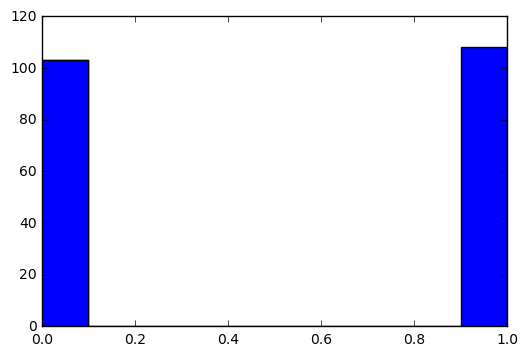